In [2]:
import os
import pandas as pd
import pm4py

Data Loading:

In [2]:
file_dir = '../data/'
file_name = 'Hospital_Billing_Eventlog.xes'
download_url = 'https://data.4tu.nl/file/6af6d5f0-f44c-49be-aac8-8eaa5fe4f6fd/28b83e72-375e-4da4-8459-a8506e898edf'
# Check if file exists and download it if not

# Check if directory exists
if not os.path.exists(file_dir):
    os.system("mkdir " + file_dir)
if not os.path.exists(file_dir + file_name):
    print('Downloading file...')
    os.system(f'wget -O {file_dir + file_name + ".gz"} {download_url}')
    os.system(f'gzip -d {file_dir + file_name + ".gz"}')


--2024-07-09 18:01:13--  https://data.4tu.nl/file/6af6d5f0-f44c-49be-aac8-8eaa5fe4f6fd/28b83e72-375e-4da4-8459-a8506e898edf
Auflösen des Hostnamens data.4tu.nl (data.4tu.nl)… 131.180.169.22
Verbindungsaufbau zu data.4tu.nl (data.4tu.nl)|131.180.169.22|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 6615825 (6,3M) [application/octet-stream]
Wird in »../data/Hospital_Billing_Eventlog.xes.gz« gespeichert.

     0K .......... .......... .......... .......... ..........  0%  952K 7s
    50K .......... .......... .......... .......... ..........  1%  566K 9s
   100K .......... .......... .......... .......... ..........  2% 4,12M 6s
   150K .......... .......... .......... .......... ..........  3% 64,2M 5s
   200K .......... .......... .......... .......... ..........  3% 65,9M 4s
   250K .......... .......... .......... .......... ..........  4% 48,2M 3s
   300K .......... .......... .......... .......... ..........  5% 3,54M 3s
   350K .......... ...

In [3]:
data = pm4py.read_xes(file_dir + file_name)
data = pm4py.format_dataframe(data)

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 100000/100000 [00:33<00:00, 2994.51it/s]


In [4]:
# Get overview over data
data

,isCancelled,diagnosis,time:timestamp,caseType,speciality,org:resource,concept:name,blocked,isClosed,flagD,...,closeCode,actRed,actOrange,flagC,msgCount,version,msgType,msgCode,@@index,@@case_index
0,False,A,2012-12-16 19:33:10+00:00,A,A,ResA,NEW,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,NaN,NaN,2013-12-15 19:00:37+00:00,NaN,NaN,NaN,FIN,NaN,NaN,NaN,...,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,NaN,NaN,2013-12-16 03:53:38+00:00,NaN,NaN,NaN,RELEASE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
3,NaN,NaN,2013-12-17 12:56:29+00:00,NaN,NaN,NaN,CODE OK,NaN,NaN,NaN,...,NaN,False,False,False,0.0,A,NaN,NaN,3,0
4,NaN,NaN,2013-12-19 03:44:31+00:00,NaN,NaN,ResB,BILLED,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451354,False,UE,2015-06-27 02:01:17+00:00,A,H,ResA,NEW,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,451354,99999
451355,NaN,NaN,2015-07-06 23:57:45+00:00,NaN,NaN,NaN,FIN,NaN,NaN,NaN,...,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,451355,99999
451356,NaN,NaN,2015-07-15 05:39:38+00:00,NaN,NaN,NaN,RELEASE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,451356,99999
451357,NaN,NaN,2015-07-15 06:33:01+00:00,NaN,NaN,NaN,CODE OK,NaN,NaN,NaN,...,NaN,False,False,False,0.0,E,NaN,NaN,451357,99999


Preprocessing:

In [5]:
# print columns
data = data[['@@case_index', 'diagnosis', 'concept:name', 'isCancelled', 'isClosed']]
data

,@@case_index,diagnosis,concept:name,isCancelled,isClosed
0,0,A,NEW,False,True
1,0,NaN,FIN,NaN,NaN
2,0,NaN,RELEASE,NaN,NaN
3,0,NaN,CODE OK,NaN,NaN
4,0,NaN,BILLED,NaN,NaN
...,...,...,...,...,...
451354,99999,UE,NEW,False,True
451355,99999,NaN,FIN,NaN,NaN
451356,99999,NaN,RELEASE,NaN,NaN
451357,99999,NaN,CODE OK,NaN,NaN


In [3]:
# Save as new, smaller csv
data.to_csv('../data/preprocessed_data.csv', sep=';', index=False)

NameError: name 'data' is not defined

Feature Extraction:

In [5]:
# Overview over unique values for each column
data = pd.read_csv('../data/preprocessed_data.csv', sep=';')
print("Unique value oveview:\n")
print("======================")
print(data.nunique())
print("======================")
unique_states = data["concept:name"].unique()

Unique value oveview:

@@case_index    100000
diagnosis         1191
concept:name        18
isCancelled          2
isClosed             2
dtype: int64


In [6]:
# Get traces
traces = data.groupby('@@case_index')['concept:name'].apply(tuple).reset_index().rename(columns={"concept:name": "Traces"})

In [7]:
traces

,@@case_index,Traces
0,0,"(NEW, FIN, RELEASE, CODE OK, BILLED)"
1,1,"(NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL..."
2,2,"(NEW,)"
3,3,"(NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL..."
4,4,"(NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL..."
...,...,...
99995,99995,"(NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL..."
99996,99996,"(NEW, DELETE)"
99997,99997,"(NEW, CHANGE DIAGN, DELETE)"
99998,99998,"(NEW,)"


In [8]:
# Get the value counts for each unique trace
trace_counts = traces['Traces'].value_counts()

# Convert to dictionary
trace_counts_dict = trace_counts.to_dict()

In [9]:
trace_counts_dict

{('NEW', 'CHANGE DIAGN', 'FIN', 'RELEASE', 'CODE OK', 'BILLED'): 33672,
 ('NEW',): 22373,
 ('NEW', 'FIN', 'RELEASE', 'CODE OK', 'BILLED'): 20901,
 ('NEW', 'DELETE'): 4813,
 ('NEW', 'FIN'): 3508,
 ('NEW',
  'CHANGE DIAGN',
  'CHANGE DIAGN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED'): 2121,
 ('NEW', 'CHANGE DIAGN', 'DELETE'): 1555,
 ('NEW', 'FIN', 'RELEASE', 'CODE NOK', 'BILLED'): 977,
 ('NEW',
  'CHANGE DIAGN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'REOPEN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED'): 869,
 ('NEW', 'FIN', 'RELEASE', 'CODE OK', 'BILLED', 'CODE OK'): 512,
 ('NEW', 'FIN', 'RELEASE', 'CODE NOK', 'EMPTY'): 400,
 ('NEW', 'FIN', 'RELEASE', 'BILLED'): 359,
 ('NEW',
  'CHANGE DIAGN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED',
  'STORNO',
  'REJECT',
  'BILLED'): 314,
 ('NEW',
  'FIN',
  'RELEASE',
  'CODE OK',
  'REOPEN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED'): 273,
 ('NEW',
  'CHANGE DIAGN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED',
  'STORNO',
  'REJECT


### OneHotEncoding & Hamming Distance 
1. Getting Unique pages and trace_count_dict as dataframe
2. MultiLabelBinarizer (left side classes for a matrix are unique Page Names) -> OneHotEncoding
3. If weighted enabled -> OneHot encoded matrix multiplied with count of traces
4. Hamming Distance between all traces into Matrix (based on one_hot_df)
5. Saving hammming Dataframe (matrix) as csv 



In [22]:
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.spatial.distance import pdist, squareform, hamming
import numpy as np


use_weighted = True

df = pd.DataFrame(list(trace_counts_dict.items()), columns=['Traces', 'Count'])

mlb = MultiLabelBinarizer()

one_hot_encoded = mlb.fit_transform(df['Traces'])


one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)
#one_hot_df.to_csv('../data/onehot_df.csv', sep=';', index=False)

print(one_hot_encoded[0])
#print(hamming(one_hot_encoded[0], one_hot_encoded[1]))

if use_weighted:
    weighted_one_hot_encoded = one_hot_encoded * df['Count'].values[:, None]
    print(weighted_one_hot_encoded[0])
    weighted_one_hot_df = pd.DataFrame(weighted_one_hot_encoded, columns=mlb.classes_)
else:
    weighted_one_hot_df = one_hot_df

hamming_distances = pdist(weighted_one_hot_df, metric='hamming')
hamming_matrix = squareform(hamming_distances)
hamming_matrix_df = pd.DataFrame(hamming_matrix, index=df['Traces'], columns=df['Traces'])

print(hamming_matrix_df)
#hamming_matrix_df.to_csv('../data/hamming_matrix_df.csv', sep=';', index=False)

[1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0]
[33672 33672     0     0     0 33672     0     0 33672     0     0 33672
     0 33672     0     0     0     0]
Traces                                              (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BILLED)  \
Traces                                                                                                   
(NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BILLED)                                           0.000000    
(NEW,)                                                                                       0.333333    
(NEW, FIN, RELEASE, CODE OK, BILLED)                                                         0.333333    
(NEW, DELETE)                                                                                0.388889    
(NEW, FIN)                                                                                   0.333333    
...                                                                                               ...    
(NE


### Clustering Algorithm DBSCAN:
1. Clustering of Traces based on Hamming Distance Dataframe with DBSCAN

In [23]:
from sklearn.cluster import DBSCAN


eps = 0.055  
min_samples = 2  


dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
dbscan.fit(hamming_matrix_df)

df['Cluster'] = dbscan.labels_
df_sorted = df.sort_values(by='Cluster')

df_sorted.to_csv('../data/clustered_traces_onehot_dbscan.csv', index=False)

cluster_sizes = df_sorted['Cluster'].value_counts().sort_index()
for cluster_id, size in cluster_sizes.items():
    print(f"Cluster {cluster_id}: {size} Traces")


Cluster -1: 339 Traces
Cluster 0: 3 Traces
Cluster 1: 3 Traces
Cluster 2: 3 Traces
Cluster 3: 2 Traces
Cluster 4: 2 Traces
Cluster 5: 2 Traces
Cluster 6: 2 Traces
Cluster 7: 2 Traces
Cluster 8: 2 Traces
Cluster 9: 2 Traces
Cluster 10: 3 Traces
Cluster 11: 2 Traces
Cluster 12: 2 Traces
Cluster 13: 2 Traces
Cluster 14: 3 Traces
Cluster 15: 2 Traces
Cluster 16: 2 Traces
Cluster 17: 2 Traces
Cluster 18: 2 Traces
Cluster 19: 2 Traces
Cluster 20: 4 Traces
Cluster 21: 4 Traces
Cluster 22: 2 Traces
Cluster 23: 2 Traces
Cluster 24: 2 Traces
Cluster 25: 3 Traces
Cluster 26: 2 Traces
Cluster 27: 2 Traces
Cluster 28: 2 Traces
Cluster 29: 2 Traces
Cluster 30: 2 Traces
Cluster 31: 2 Traces
Cluster 32: 5 Traces
Cluster 33: 6 Traces
Cluster 34: 2 Traces
Cluster 35: 2 Traces
Cluster 36: 4 Traces
Cluster 37: 4 Traces
Cluster 38: 9 Traces
Cluster 39: 4 Traces
Cluster 40: 3 Traces
Cluster 41: 3 Traces
Cluster 42: 2 Traces
Cluster 43: 2 Traces
Cluster 44: 3 Traces
Cluster 45: 3 Traces
Cluster 46: 3 Traces


### Evaluation:
- Silhouette Coefficient: distance between the clusters 


In [24]:
from sklearn.metrics import silhouette_score,silhouette_samples

if len(set(dbscan.labels_)) > 1:  
    silhouette_avg = silhouette_score(hamming_matrix_df, dbscan.labels_)
    print(f"Silhouette Coefficient AVG: {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(hamming_matrix_df, dbscan.labels_)
    for i in range(len(set(dbscan.labels_)) - 1):  
        ith_cluster_silhouette_values = sample_silhouette_values[dbscan.labels_ == i]
        print(f"Silhouette Coefficient for cluster {i}: {np.mean(ith_cluster_silhouette_values)}")
else:
    print("Only one cluster found. No Silhouette Coefficient.")

Silhouette-Koeffizient: 0.453222903759499
Silhouette-Koeffizient für Cluster 0: 0.9999989845504197
Silhouette-Koeffizient für Cluster 1: 0.9999995823476627
Silhouette-Koeffizient für Cluster 2: 0.9999989845504197
Silhouette-Koeffizient für Cluster 3: 0.9999993752602837
Silhouette-Koeffizient für Cluster 4: 0.9999991934644944
Silhouette-Koeffizient für Cluster 5: 0.9999993098488226
Silhouette-Koeffizient für Cluster 6: 0.9999991769466947
Silhouette-Koeffizient für Cluster 7: 0.9999992030820639
Silhouette-Koeffizient für Cluster 8: 0.9999993193832186
Silhouette-Koeffizient für Cluster 9: 0.9999987881343596
Silhouette-Koeffizient für Cluster 10: 0.9999988383024626
Silhouette-Koeffizient für Cluster 11: 0.9999993748461373
Silhouette-Koeffizient für Cluster 12: 0.9999989179384373
Silhouette-Koeffizient für Cluster 13: 0.9999991530750305
Silhouette-Koeffizient für Cluster 14: 0.9999992585357829
Silhouette-Koeffizient für Cluster 15: 0.9999989514112481
Silhouette-Koeffizient für Cluster 16: 0

### Visualization:

- Using TSNE to visualize results

/usr/local/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


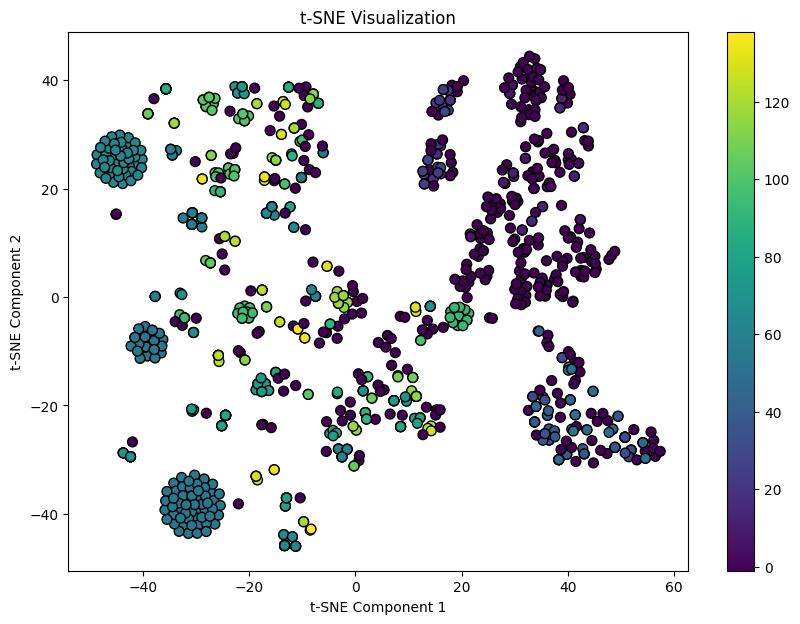

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2, perplexity=30, n_iter=700)
tsne_result = tsne.fit_transform(hamming_matrix_df)
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dbscan.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()


